<a href="https://colab.research.google.com/github/YASHSHARMA704/Vehicle-Routing-Using-Genetic-Algorithm/blob/main/Vehicle_Routing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [36]:
# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.


In [5]:
# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function "mate" that uses "partially matched crossover technique" suitable for permutation-based representation -> uses to inherited one segment from one parent and remaining from another in order to maintain uniqueness.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [40]:
def plot_routes(individual, title="Optimal Route"):
    plt.figure(figsize=(10, 8))
    # Colors and markers for different vehicles
    colors = plt.cm.viridis(np.linspace(0, 1, num_vehicles))
    markers = ['o', 's', '^', 'D', 'v', '*']

    # Plot routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        x_coords, y_coords = zip(*vehicle_route)
        plt.plot(x_coords, y_coords, '-', color=colors[i], marker=markers[i % len(markers)],
                 label=f'Vehicle {i+1}', markersize=10, linewidth=2)

    # Plot locations
    for (x, y) in locations:
        plt.plot(x, y, 'bo', markersize=8, zorder=1)  # Blue dots for locations

    # Plot the depot last so it is not overlapped
    plt.plot(depot[0], depot[1], 'rs', markersize=12, label='Depot', zorder=2)  # Red square for depot

    plt.title(title, fontsize=16)
    plt.xlabel('X Coordinate', fontsize=14)
    plt.ylabel('Y Coordinate', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()



gen	nevals	avg    	min    
0  	250   	620.193	2.21488
1  	188   	602.674	1.14745
2  	187   	591.238	6.90024
3  	208   	587.844	2.80082
4  	186   	578.577	4.36645
5  	182   	571.839	3.61073
6  	193   	565.151	3.61073
7  	185   	565.115	3.61073
8  	192   	557.042	3.61073
9  	204   	560.364	3.18387
10 	199   	558.037	2.02367
11 	189   	553.995	2.02367
12 	183   	545.454	6.82168
13 	192   	552.748	5.0153 
14 	177   	546.801	5.0153 
15 	199   	539.199	3.80737
16 	196   	527.499	2.55453
17 	194   	509.439	3.48621
18 	194   	488.7  	5.0153 
19 	191   	477.986	4.60972
20 	194   	462.024	4.59959
21 	200   	449.825	4.43354
22 	195   	436.746	3.16667
23 	192   	427.462	0.947472
24 	180   	410.579	4.91084 
25 	203   	405.963	5.66273 
26 	198   	394.826	10.1354 
27 	203   	388.292	3.11317 
28 	195   	379.429	6.72021 
29 	202   	372.884	5.13653 
30 	193   	369.612	16.5292 
31 	191   	361.254	4.11745 
32 	189   	351.014	12.0597 
33 	189   	342.969	5.15124 
34 	192   	346.343	5.22209 
35 	187   	340.5

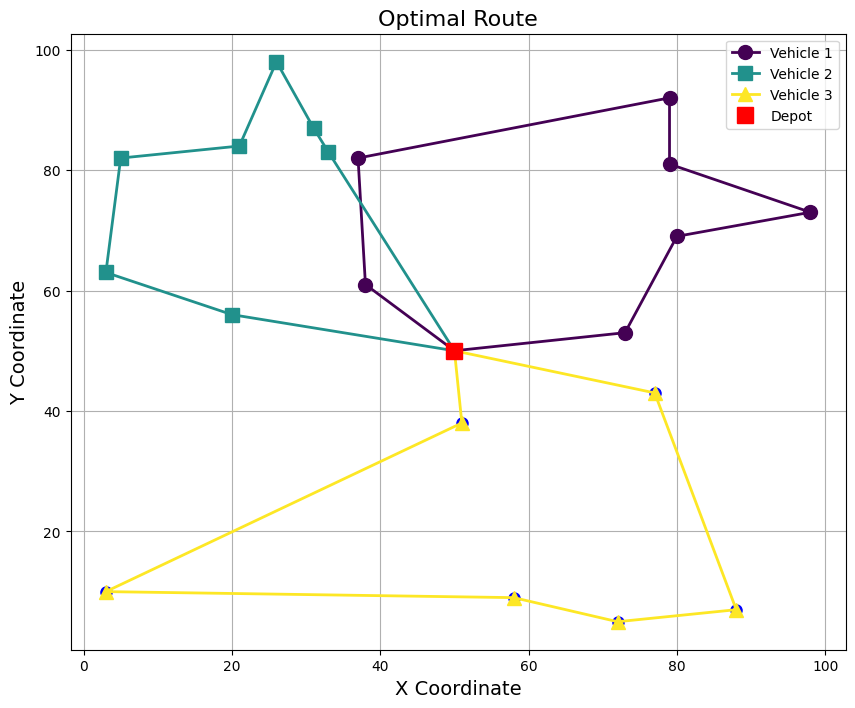

In [53]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=250)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 150, stats=stats, halloffame=hof)

    best_individual = hof[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_individual.fitness.values[0])

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()